# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [94]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


# To tune different models
from sklearn.model_selection import GridSearchCV

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [95]:
# Read the data from csv file

visa = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [96]:
# Create a copy of the data so that any changes to the data doesn't affect original data frame

visa_copy = visa.copy()

<IPython.core.display.Javascript object>

In [97]:
# Reading first and last 5 rows of data

visa.head(-5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25471,EZYV25472,Asia,High School,N,N,40224,1962,Island,75587.4200,Year,Y,Certified
25472,EZYV25473,Asia,High School,N,N,1346,2003,Midwest,76155.6000,Year,N,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified


<IPython.core.display.Javascript object>

In [98]:
# read data shape

visa.shape

(25480, 12)

<IPython.core.display.Javascript object>

#### Observation:

There are 25480 rows and 12 columns in the data

In [99]:
# checking the data types of the columns

visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

#### Observations
1. All the 12 columns has 25480 rows. No missing data (NA) in all the columns
2. All the columns has expected data types, so no data mismatch in any columns

In [100]:
# checking for duplicates

visa.duplicated().any()

False

<IPython.core.display.Javascript object>

In [101]:
# checking for category columns unique values
category_columns = visa.columns[visa.dtypes == "object"].to_list()

# removing case id as it is unique for all records and no data can be infered from it
for col in category_columns:
    print(col, visa[col].unique())

case_id ['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']
continent ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
education_of_employee ['High School' "Master's" "Bachelor's" 'Doctorate']
has_job_experience ['N' 'Y']
requires_job_training ['N' 'Y']
region_of_employment ['West' 'Northeast' 'South' 'Midwest' 'Island']
unit_of_wage ['Hour' 'Year' 'Week' 'Month']
full_time_position ['Y' 'N']
case_status ['Denied' 'Certified']


<IPython.core.display.Javascript object>

In [102]:
# checking the spread of numerical columns
visa.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

#### Observations:
1. No. of employees varies from -26 to 602,069 with a mean of 5667 per company
2. companies are in from the year 1800 till 2016. 50% companies are in the range 1976 to 2005
3. wages vary frp, 2.1367 to 319,210 with an average wage of 744455.82

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [103]:
def create_histogram_boxplot(data, column_name, kde=False, figsize=(10, 5)):
    # create plots sidebyside nrows=1 and ncols=2
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    sns.boxplot(data=data, ax=ax_box2, x=column_name)
    sns.histplot(data=data, ax=ax_hist2, x=column_name, kde=kde)
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

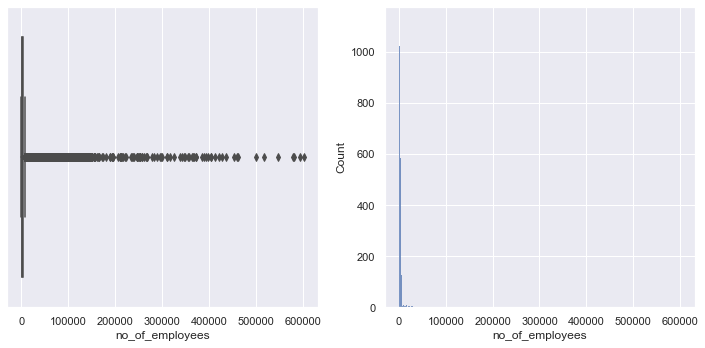

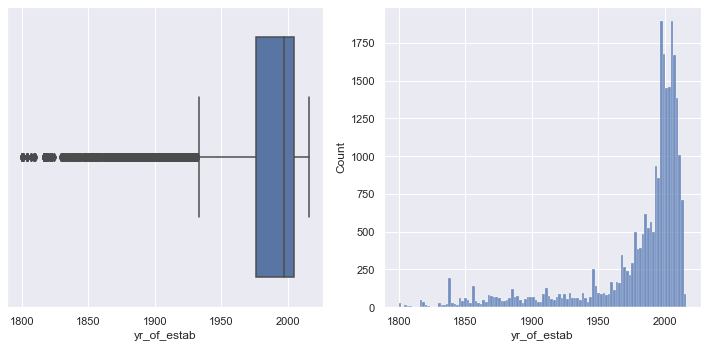

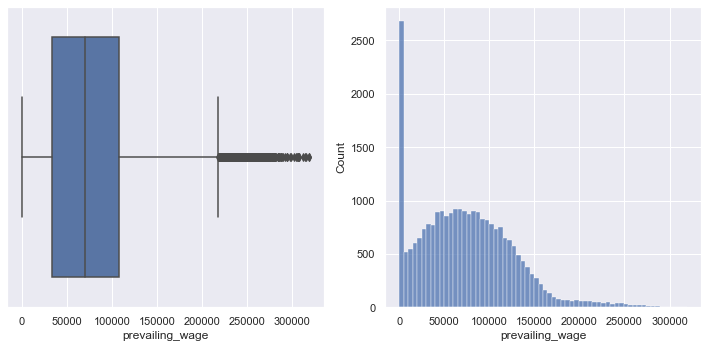

<IPython.core.display.Javascript object>

In [104]:
numerical_cols = visa.columns[visa.dtypes != "object"].tolist()
for col in numerical_cols:
    create_histogram_boxplot(visa, col)

#### Observations:
1. No. of employees varies from -26 to 602,069 with a mean of 5667 per company
2. companies are in from the year 1800 till 2016. 50% companies are in the range 1976 to 2005
3. wages vary frp, 2.1367 to 319,210 with an average wage of 744455.82
4. Outliers present in all the 3 columns
5. yr_of_establishment has left skewed distribution
6. prevailing_wage has right skewed distribution

In [105]:
# Count plot for category attributes


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

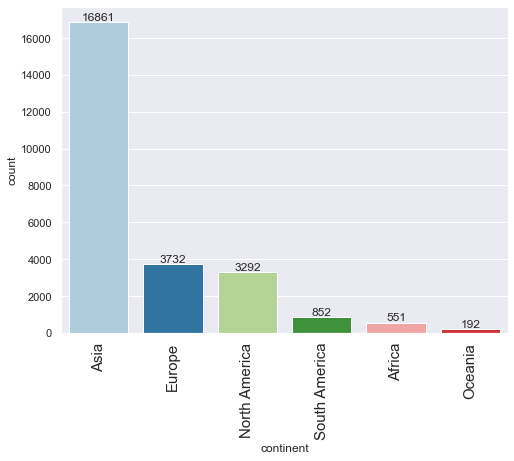

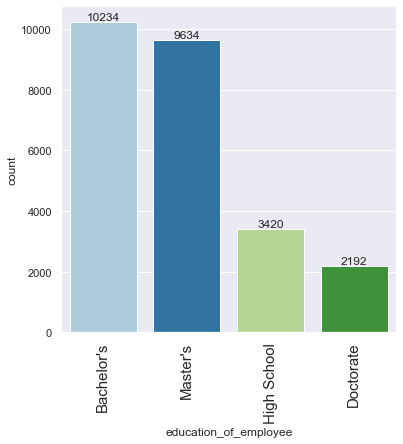

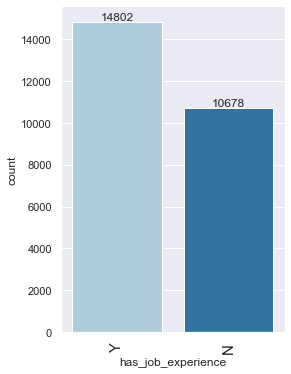

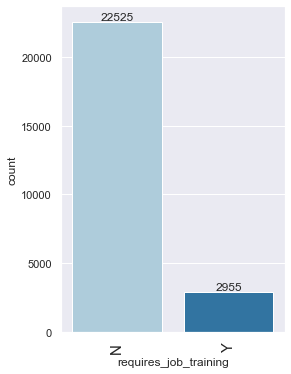

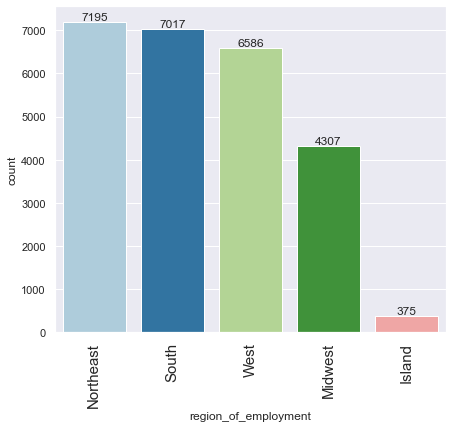

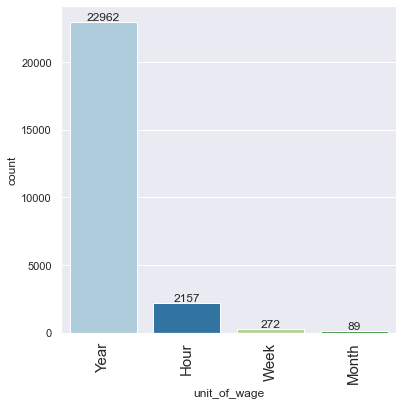

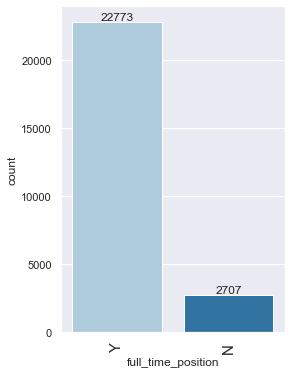

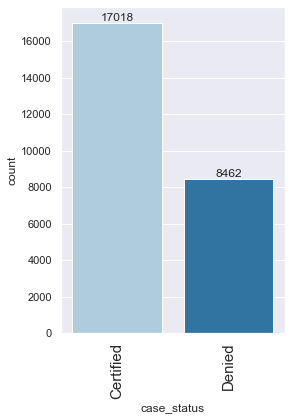

<IPython.core.display.Javascript object>

In [106]:
category_columns.remove("case_id")
for col in category_columns:
    labeled_barplot(visa, col, (30, 5))

#### Observations:

- Employees are mostly from Asia.
- Employees under work visa mostly have Bachelor's degree and Master's degree
- There are both kind of employees working in work visa who has job exp and who doesn't have job experience.
- Employees under work visa are high skilled labors and doesn't require training
- Employees working with visa in west northern and south are almost equal, midwest has count less than other 3. Island has relatively a very small head count of employees working with work visa.
- Yearly wage people are more than hourly, weekly and monthly wage employees
- Employees applying as a full_time_position employee is more than contract employees
- case_status certified is more compared to denied

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

In [107]:
visa.groupby(["education_of_employee", "unit_of_wage"]).agg(
    emp_count=("case_id", "count"),
    min_wage=("prevailing_wage", "min"),
    max_wage=("prevailing_wage", "max"),
)

emp_count    min_wage     max_wage
education_of_employee unit_of_wage                                    
Bachelor's            Hour                981      5.1868     994.1811
                      Month                41   8264.2200  249291.1200
                      Week                126   2183.2300  280175.9500
                      Year               9086    113.9600  314156.0600
Doctorate             Hour                 96      3.4889     986.5337
                      Month                 5  19425.4000  118724.3800
                      Week                  8  49705.6400  125683.0300
                      Year               2083    104.1700  285088.1600
High School           Hour                395      2.9561     997.6877
                      Month                13   1599.2800  264362.9500
                      Week                 32   4229.4300  229950.7000
                      Year               2980    181.8700  319210.2700
Master's              Hour                685      2.1367     999.9195
                      Month                30   3078.3700  234902.2000
                      Week                106   4879.3400  234406.3600
                      Year               8813    100.0000  318446.0500

<IPython.core.display.Javascript object>

#### Observations

1. Both bachelor's and master's degree holders have almost 8813, 9086 employee working on a yearly wages indicating the master's degree necesssarily doesn't attribute for people being in abroad working
2. Doing a master degree and working here in visa could be a reason for them to be in abroad. That count has both group of people working in visa in US with master degree from india and master degree from US
3. High school pass outs may be the working population doing non engineering job profiles

**How does the visa status vary across different continents**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Africa'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Oceania')])

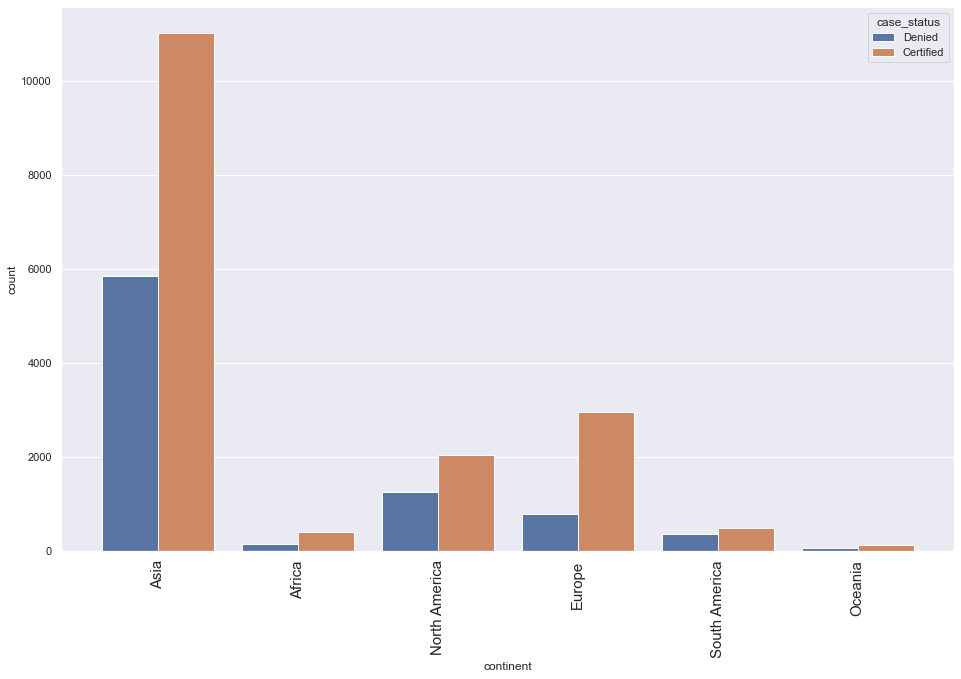

<IPython.core.display.Javascript object>

In [108]:
ax = sns.countplot(x="continent", hue="case_status", data=visa)
ax.plot()
plt.xticks(rotation=90, fontsize=15)

#### Observations
- In all continents Certified count is higher than the denial count

**Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

(array([0, 1]), [Text(0, 0, 'N'), Text(1, 0, 'Y')])

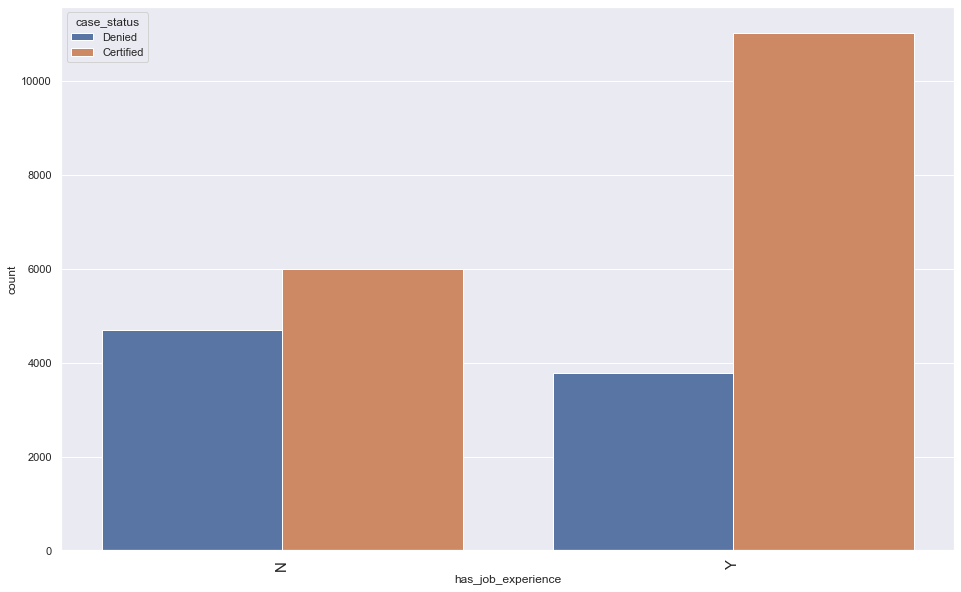

<IPython.core.display.Javascript object>

In [109]:
ax = sns.countplot(x="has_job_experience", hue="case_status", data=visa)
ax.plot()
plt.xticks(rotation=90, fontsize=15)

#### Observations
- Experienced professionals working with work visa is higher
- Experience professionals visa status certified is higher than non experienced professional certified count

**In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Hour'),
  Text(1, 0, 'Year'),
  Text(2, 0, 'Week'),
  Text(3, 0, 'Month')])

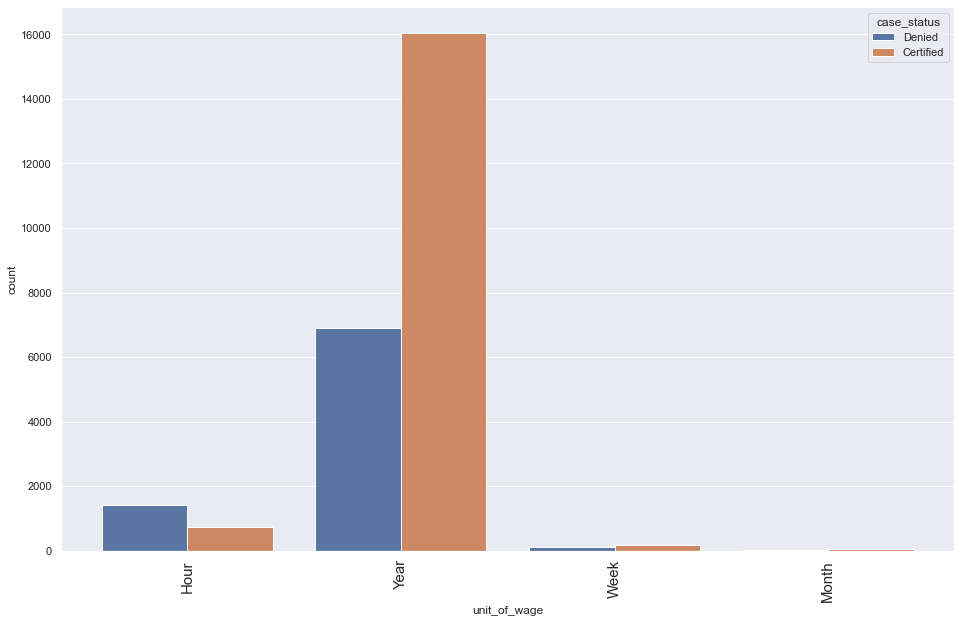

<IPython.core.display.Javascript object>

In [110]:
ax = sns.countplot(x="unit_of_wage", hue="case_status", data=visa)
ax.plot()
plt.xticks(rotation=90, fontsize=15)

#### Observations
- Yearly wages professionals have higher case_status certified 

**The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

In [111]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

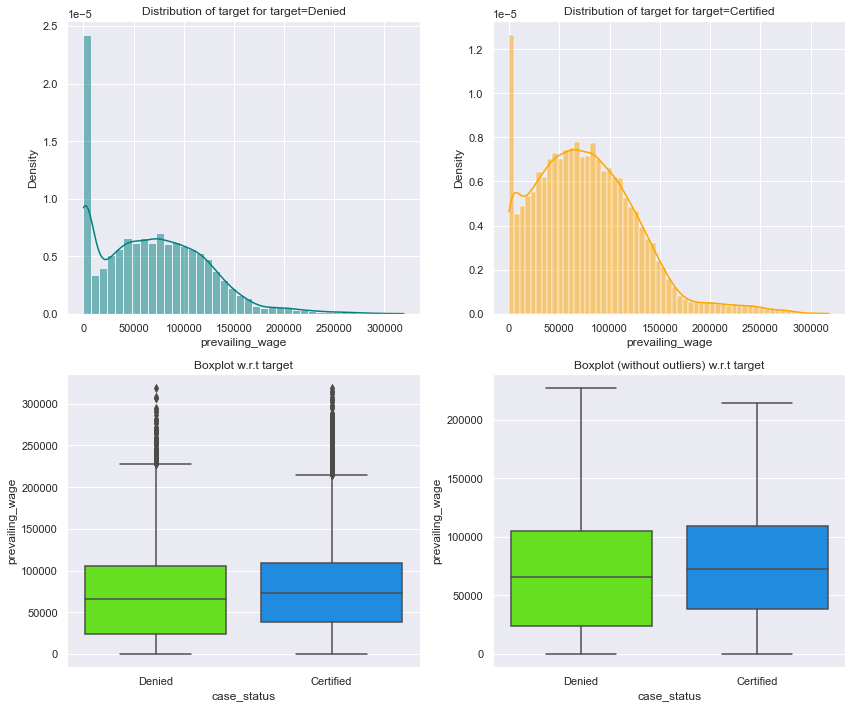

<IPython.core.display.Javascript object>

In [112]:
distribution_plot_wrt_target(visa, "prevailing_wage", "case_status")

#### Observations
- Denial case_status is high for low salaried professionals
- case_status certified is high for high salaried professionals

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

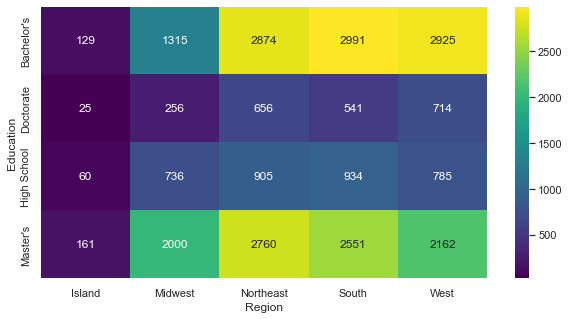

<IPython.core.display.Javascript object>

In [113]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(visa.education_of_employee, visa.region_of_employment),
    annot=True,
    fmt="g",
    cmap="viridis",
)  ## Complete the code to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

#### Observations:
- Professionals with bachelor's and master's degree in west, south and northeast are more
- visa professional with doctrate has least head count of employees

#### Checking if the prevailing wage is similar across all the regions of the US

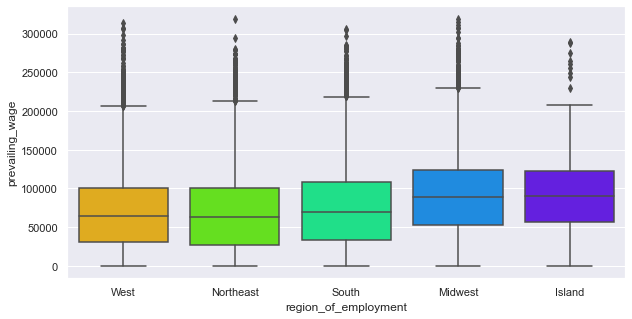

<IPython.core.display.Javascript object>

In [114]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=visa, x="region_of_employment", y="prevailing_wage", palette="gist_rainbow"
)
plt.show()

#### Observations
- midwest and island has higher prevailling wages comparitively

### Bivariate Analysis

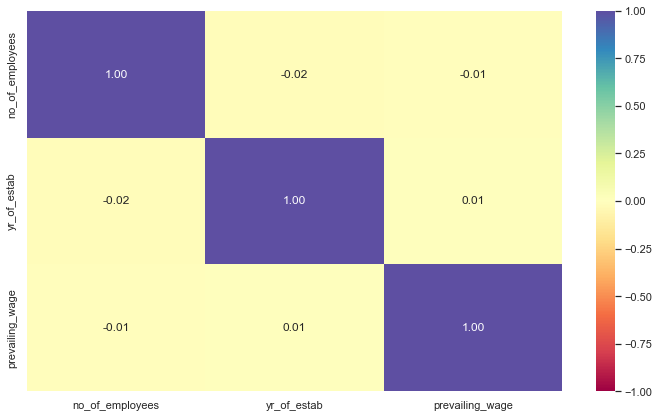

<IPython.core.display.Javascript object>

In [115]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    visa[numerical_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
- The variables no_of_employees, yr_of_estab and prevailing_wage are not correlated

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### No missing values are present ####

#### Convert all Object types to category type ####

In [116]:
for col in category_columns:
    visa_copy[col] = visa_copy[col].astype("category")

<IPython.core.display.Javascript object>

#### Outlier treatment

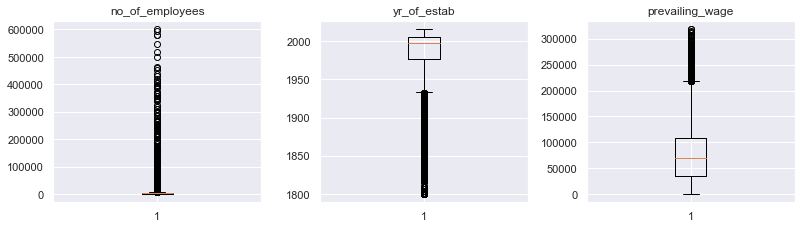

<IPython.core.display.Javascript object>

In [117]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(visa[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Though there are many outliers in all the three columns, The data is a required value so we need to treat them and we can proceed as it is.

#### Drop column case_id column as it is not useful data except for detrmining unique id of the record

In [118]:
visa_copy.drop(columns=["case_id"], inplace=True, axis=1)
visa_copy.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Replace Y with 1 and N with 0 in columns has_job_experience, requires_job_training, full_time_position

In [119]:
column_name_for_repl = [
    "has_job_experience",
    "requires_job_training",
    "full_time_position",
]
for col in column_name_for_repl:
    visa_copy[col] = visa_copy[col].replace("Y", 1)
    visa_copy[col] = visa_copy[col].replace("N", 0)

<IPython.core.display.Javascript object>

#### Replace case_status column values with 1 and  0 instead of  'Certified' and 'Denied' respectively

In [120]:
visa_copy["case_status"] = visa_copy["case_status"].replace("Certified", 1)
visa_copy["case_status"] = visa_copy["case_status"].replace("Denied", 0)

<IPython.core.display.Javascript object>

In [121]:
visa_copy.head(-5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.2029,Hour,1,0
1,Asia,Master's,1,0,2412,2002,Northeast,83425.6500,Year,1,1
2,Asia,Bachelor's,0,1,44444,2008,West,122996.8600,Year,1,0
3,Asia,Bachelor's,0,0,98,1897,West,83434.0300,Year,1,0
4,Africa,Master's,1,0,1082,2005,South,149907.3900,Year,1,1
...,...,...,...,...,...,...,...,...,...,...,...
25470,North America,Master's,1,0,2272,1970,Northeast,516.4101,Hour,1,1
25471,Asia,High School,0,0,40224,1962,Island,75587.4200,Year,1,1
25472,Asia,High School,0,0,1346,2003,Midwest,76155.6000,Year,0,1
25473,Asia,Bachelor's,1,0,2421,2007,Northeast,22845.5600,Year,1,1


<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [122]:
visa_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


<IPython.core.display.Javascript object>

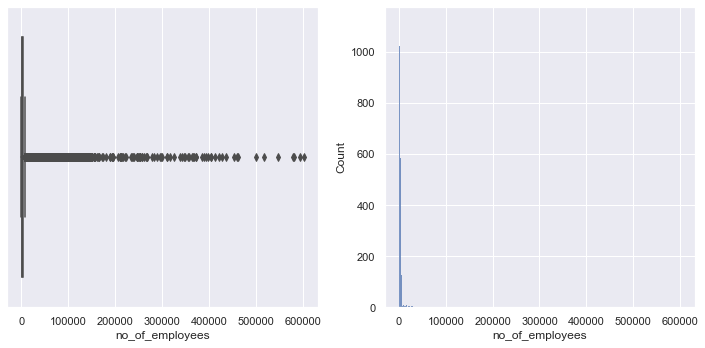

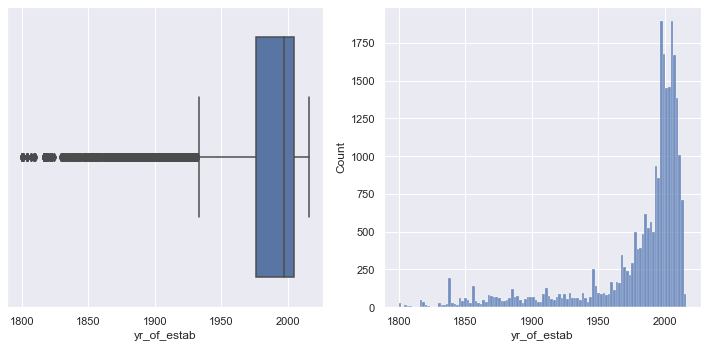

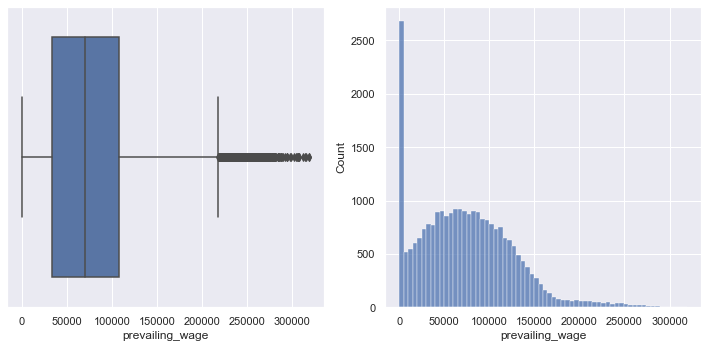

<IPython.core.display.Javascript object>

In [123]:
numerical_cols = visa_copy.columns[visa_copy.dtypes != "category"].tolist()
for col in numerical_cols:
    create_histogram_boxplot(visa_copy, col)

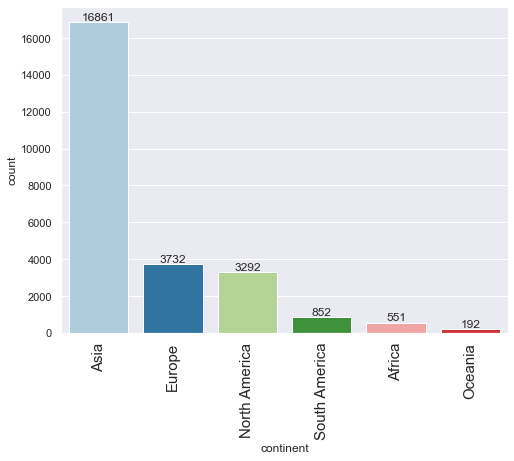

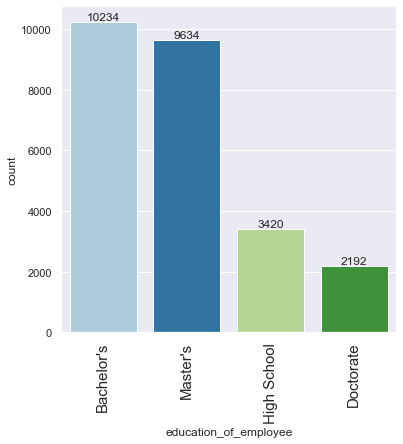

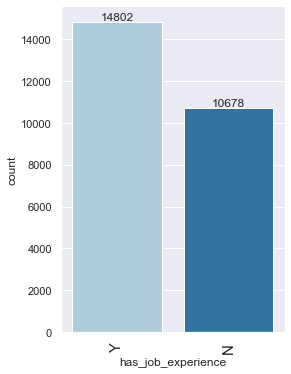

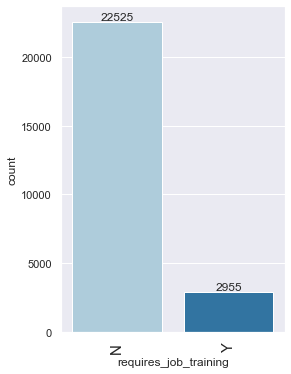

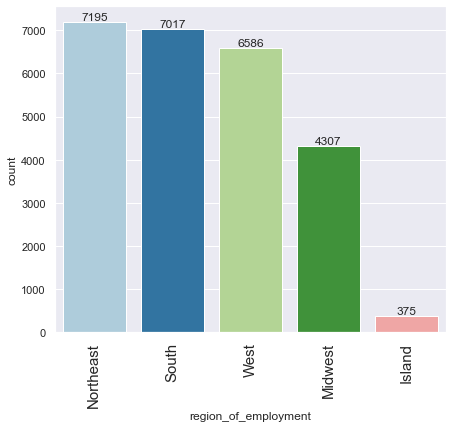

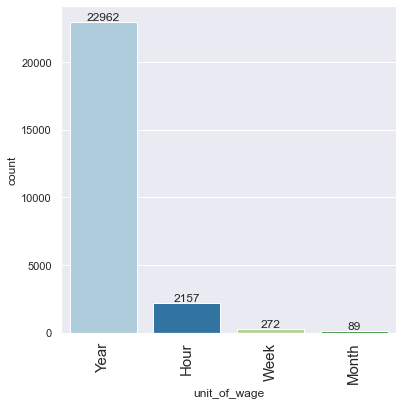

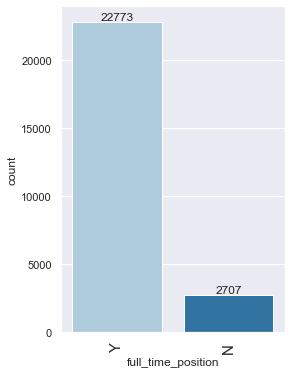

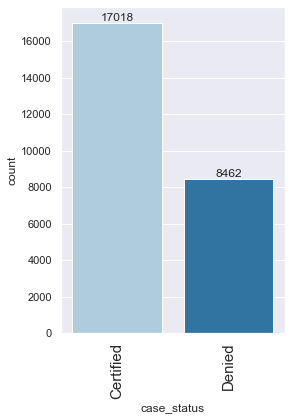

<IPython.core.display.Javascript object>

In [124]:
category_columns = visa_copy.columns[visa_copy.dtypes == "category"].to_list()
for col in category_columns:
    labeled_barplot(visa, col, (30, 5))

## Data Preprocessing


### Data Preparation for Modeling

In [125]:
visa_copy.head(-5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.2029,Hour,1,0
1,Asia,Master's,1,0,2412,2002,Northeast,83425.6500,Year,1,1
2,Asia,Bachelor's,0,1,44444,2008,West,122996.8600,Year,1,0
3,Asia,Bachelor's,0,0,98,1897,West,83434.0300,Year,1,0
4,Africa,Master's,1,0,1082,2005,South,149907.3900,Year,1,1
...,...,...,...,...,...,...,...,...,...,...,...
25470,North America,Master's,1,0,2272,1970,Northeast,516.4101,Hour,1,1
25471,Asia,High School,0,0,40224,1962,Island,75587.4200,Year,1,1
25472,Asia,High School,0,0,1346,2003,Midwest,76155.6000,Year,0,1
25473,Asia,Bachelor's,1,0,2421,2007,Northeast,22845.5600,Year,1,1


<IPython.core.display.Javascript object>

In [126]:
y = visa_copy["case_status"]
X = visa_copy.drop("case_status", axis=1)
category_columns.remove("case_status")
X = pd.get_dummies(X, columns=category_columns)

<IPython.core.display.Javascript object>

In [127]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(17836, 28) (7644, 28)


<IPython.core.display.Javascript object>

**Note**: The stratify argument maintains the original distribution of classes in the target variable while splitting the data into train and test sets.

In [128]:
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

In [129]:
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

## Model evaluation criterion


**The model can make wrong predictions as:**
1. Predicting a professional's case_status certified when it is denied.
2. Predicting a professional's case_status denied when it is actually certified.

**Which case is more important?**
1. If the model predicts certified and it is actually denied then a qualified professional is not being selected for the position which is a loss for the company and government as the person is not going add to the upliftment of the company and country.
2. If the model predicts a denied and it is actually certified then the company and the country are eventually loosing a potential candidate which is loss to them again. 

**Which metric to optimize?**
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

## Building bagging and boosting models

**Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [130]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [131]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.658817  0.735162   0.749251  0.74214


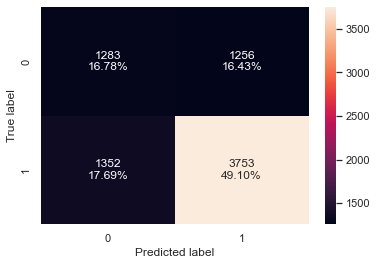

<IPython.core.display.Javascript object>

In [132]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

# Calculating different metrics
d_tree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", d_tree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [133]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.18, 1: 0.72}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=8,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.658817  0.735162   0.749251  0.74214


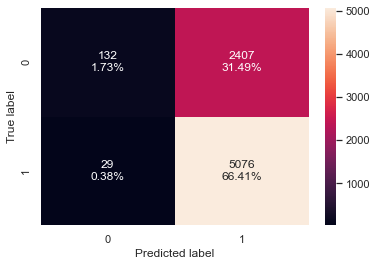

<IPython.core.display.Javascript object>

In [134]:
# Calculating different metrics
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

* The decision tree is overfitting the training data.
* but still f1 score has not increased.

## Bagging - Model Building and Hyperparameter Tuning

### Random Forest Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.722135  0.830754   0.770951  0.799736


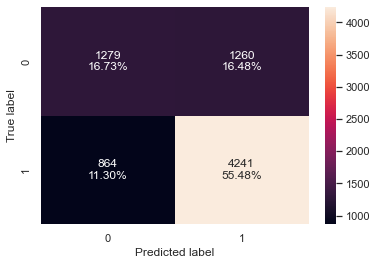

<IPython.core.display.Javascript object>

In [135]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

- Random forest is giving a slightly higher test f1-score than decision trees but overfitting the training data.
- Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [136]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
max_features = ["auto", "sqrt"]
max_depth = [2, 5]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

parameters = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=4)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=48, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.687878  0.985142   0.685274  0.808292
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.686682  0.98668   0.684003  0.807924


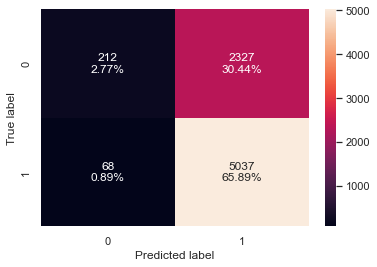

<IPython.core.display.Javascript object>

In [137]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

* The overfitting has reduced significantly and the model performance has improved.
* The test recall and test f1-score have increased.

### Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.984021  0.984639   0.991379  0.987997
   Accuracy   Recall  Precision        F1
0  0.703689  0.77571   0.779528  0.777614


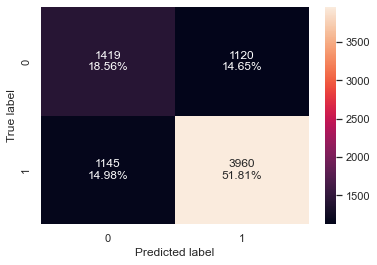

<IPython.core.display.Javascript object>

In [138]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print(bagging_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* Bagging classifier is not overfitting the training data but test performance is low.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [140]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    bagging_estimator_tuned, parameters, scoring=scorer, cv=5, n_jobs=4
)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

   Accuracy   Recall  Precision        F1
0  0.989123  0.99765   0.986225  0.991905
   Accuracy    Recall  Precision        F1
0  0.732732  0.872674   0.761799  0.813476


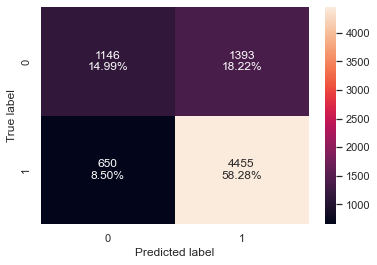

<IPython.core.display.Javascript object>

In [141]:
# Calculating different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print(bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

* the model recall and f1 score performance has increased after hyperparameter tuning.
* Let's try now try boosting models.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.737329  0.885755    0.76045  0.818333
   Accuracy    Recall  Precision        F1
0  0.734694  0.883643   0.758789  0.816471


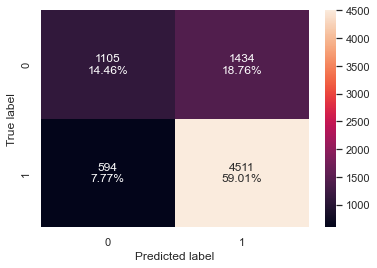

<IPython.core.display.Javascript object>

In [142]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print(ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

* Adaboost is giving more generalized performance than previous models f1-score is also better than other models. 

### Hyperparameter Tuning

In [143]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": n_estimators,
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5, n_jobs=4)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.30000000000000004, n_estimators=17,
                   random_state=1)

<IPython.core.display.Javascript object>

   Accuracy    Recall  Precision        F1
0  0.752243  0.878284   0.778961  0.825646
   Accuracy    Recall  Precision       F1
0  0.741366  0.874633   0.769562  0.81874


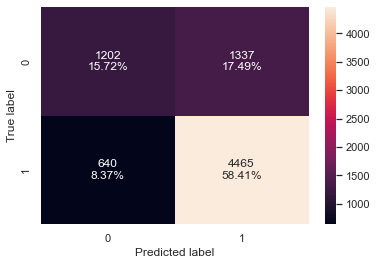

<IPython.core.display.Javascript object>

In [144]:
# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print(abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

* The model performance has decreased slightly in both training data and test data.

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757064  0.881474   0.782372  0.828972
Testing performance:
    Accuracy   Recall  Precision        F1
0   0.74516  0.87522   0.773144  0.821022


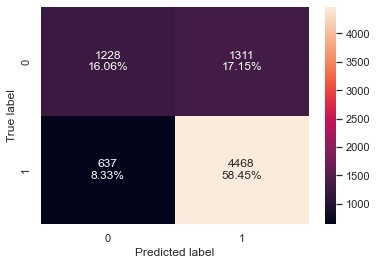

<IPython.core.display.Javascript object>

In [145]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

* The gradient boosting classifier is not overfitting the training data.
* It gives a better f1score in both test and training data

### Hyperparameter Tuning

In [146]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
max_features = ["auto", "sqrt"]

# Grid of parameters to choose from
parameters = {
    "n_estimators": n_estimators,
    "subsample": [0.8, 0.9, 1],
    "max_features": max_features,
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5, n_jobs=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features='auto', n_estimators=56, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.752915  0.881474   0.778082  0.826558
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746206  0.878942   0.772422  0.822247


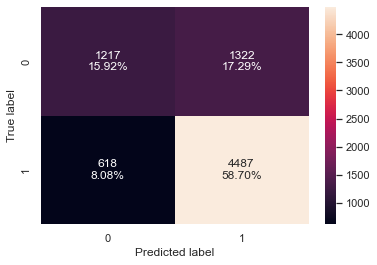

<IPython.core.display.Javascript object>

In [147]:
# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

* There is not much difference in the model performance after hyperparameter tuning.

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.839538  0.933266   0.843231  0.885967
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.729461  0.857199   0.765704  0.808872


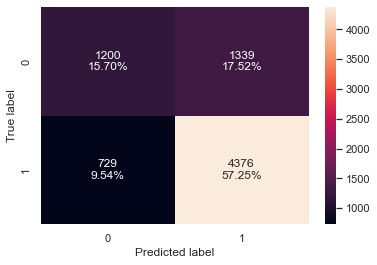

<IPython.core.display.Javascript object>

In [148]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

* xgboost classifier is not overfitting the training data.
* F1 score looks less than GradientBoostingClassifier lets see if hyperparameter tuning improves the value

### Hyperparameter Tuning

In [149]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5, n_jobs=6)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756336  0.897507   0.773829  0.831092
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743197  0.890304   0.764122  0.822401


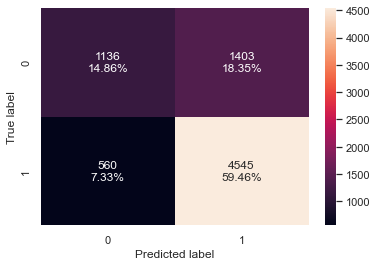

<IPython.core.display.Javascript object>

In [150]:
# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

* f1 score looks equal in both training and test and has not significantly changed from previous model.

## Stacking Model

In [151]:
estimators = [
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=2,
                                                       n_estimators=48,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features='auto',
                                                           n_estimators=56,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.18,
                                                                     1: 0.72},
                                                       max_depth=8,
      

<IPython.core.display.Javascript object>

Training performance:
    Accuracy   Recall  Precision        F1
0  0.751906  0.87308   0.781208  0.824593
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.747122  0.872478   0.776499  0.821695


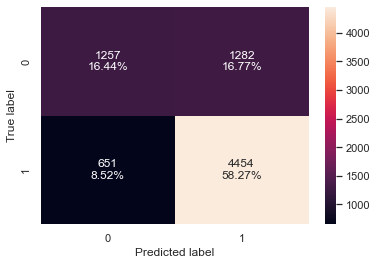

<IPython.core.display.Javascript object>

In [152]:
# Calculating different metrics
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

* The stacking classifier is giving a similar performance as compared to XGBoost.
* The confusion matrix shows that the model can identify case approved better than identifying case rejected.

## Comparing all models

In [153]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,0.999944,0.687878,0.984021,0.989123,0.737329,0.752243,0.757064,0.752915,0.839538,0.756336,0.751906
Recall,1.0,1.0,0.999916,0.985142,0.984639,0.997650,0.885755,0.878284,0.881474,0.881474,0.933266,0.897507,0.873080
Precision,1.0,1.0,1.000000,0.685274,0.991379,0.986225,0.760450,0.778961,0.782372,0.778082,0.843231,0.773829,0.781208
F1,1.0,1.0,0.999958,0.808292,0.987997,0.991905,0.818333,0.825646,0.828972,0.826558,0.885967,0.831092,0.824593


<IPython.core.display.Javascript object>

In [154]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.658817,0.658817,0.722135,0.686682,0.703689,0.732732,0.734694,0.741366,0.745160,0.746206,0.729461,0.743197,0.747122
Recall,0.735162,0.735162,0.830754,0.986680,0.775710,0.872674,0.883643,0.874633,0.875220,0.878942,0.857199,0.890304,0.872478
Precision,0.749251,0.749251,0.770951,0.684003,0.779528,0.761799,0.758789,0.769562,0.773144,0.772422,0.765704,0.764122,0.776499
F1,0.742140,0.742140,0.799736,0.807924,0.777614,0.813476,0.816471,0.818740,0.821022,0.822247,0.808872,0.822401,0.821695


<IPython.core.display.Javascript object>

* The majority of the models are overfitting the training data in terms of f1-score.
* The XGBoost Classifier tuned is giving the highest f1-score on the test data and is almost the same in the training data.
* The XGBoost Classifier tuned is giving a more generalized performance as compared to the XGBoost classifier. 

### Feature importance of Tuned XGBoost

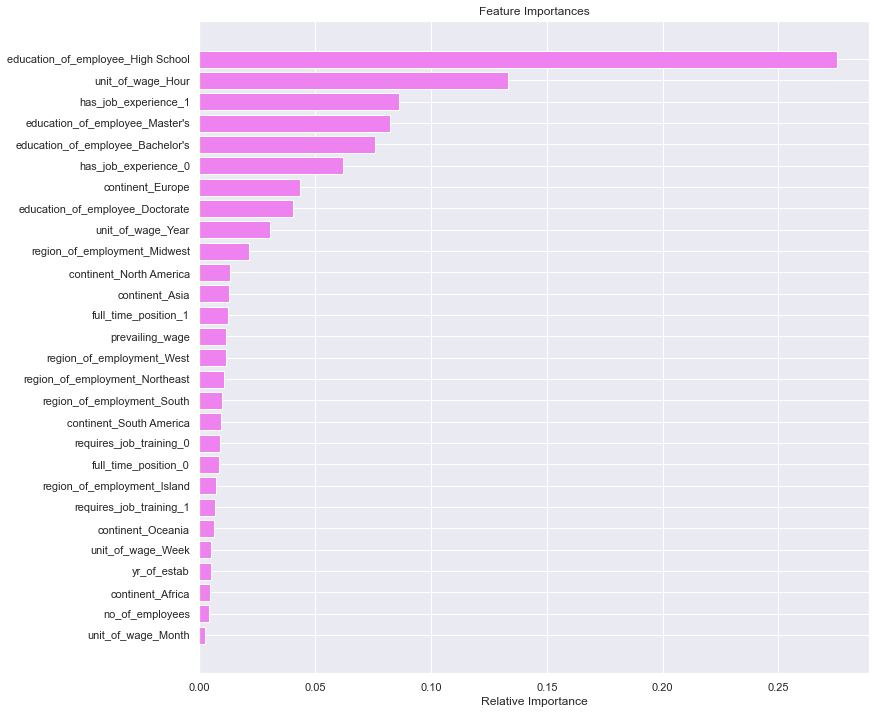

<IPython.core.display.Javascript object>

In [155]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

education_of_employee and job_experience plays major role in people getting visa approval

## Actionable Insights and Recommendations

- Based on our analysis, we can say that the professional employees visa approval status has the following features in comparison to the rejected status: 
    - education.
    - has job expereince. 
    - higher prevailing age.
    - yearly and hourly wages.
    - professionals with eductaion high school has more visa approval chances.
    - Professionals from Europe has better chances of approval.
- The professional is not having job experience they should have higher degree for improving their chances of approval
- The professional with job experience and higher prevailaing wages can have better chances of approval rate
- The professional from Europe continent has higher chances of approval rate
- parameters like monthly_wages and weekly_wages, no_of_employees,yr_of_establishment,region_of_employment and full_time_position doesn't contribute much to the visa_status

## Detailed Exploratory Data Analysis (EDA)

### Univariate analysis

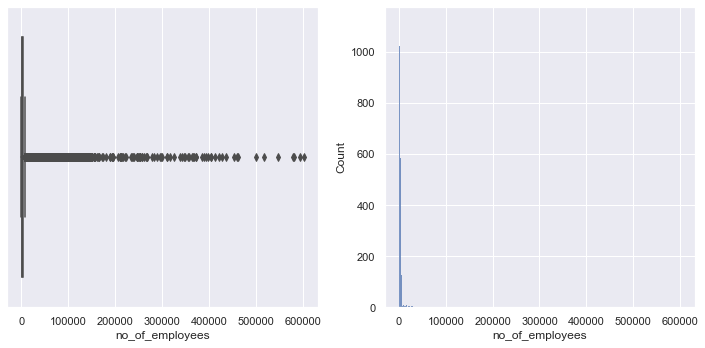

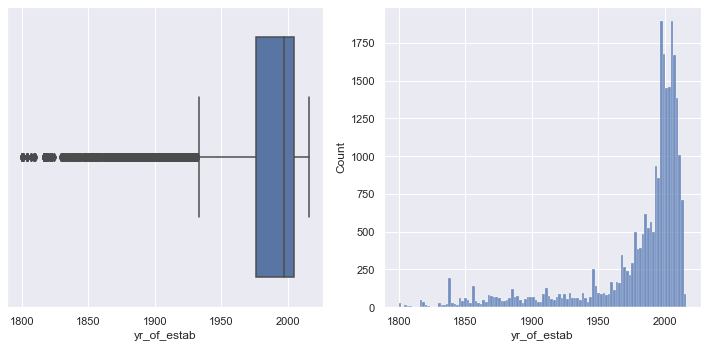

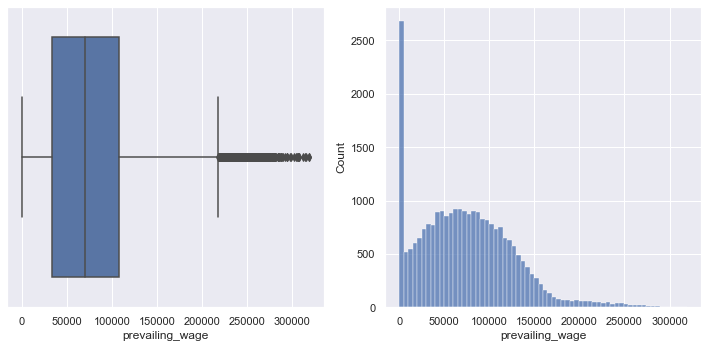

<IPython.core.display.Javascript object>

In [156]:
for col in numerical_cols:
    create_histogram_boxplot(visa_copy, col)

#### Observations:
1. No. of employees varies from -26 to 602,069 with a mean of 5667 per company
2. companies are in from the year 1800 till 2016. 50% companies are in the range 1976 to 2005
3. wages vary frp, 2.1367 to 319,210 with an average wage of 744455.82
4. Outliers present in all the 3 columns
5. yr_of_establishment has left skewed distribution
6. prevailing_wage has right skewed distribution

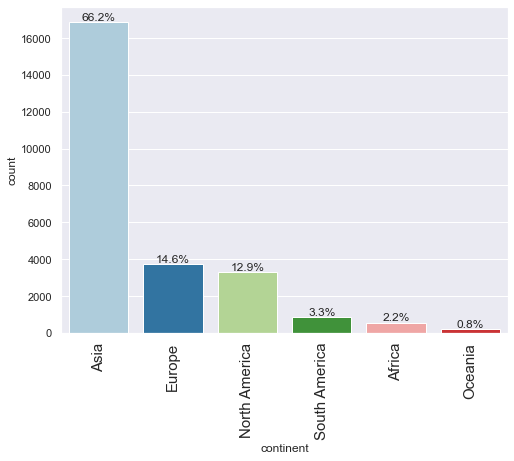

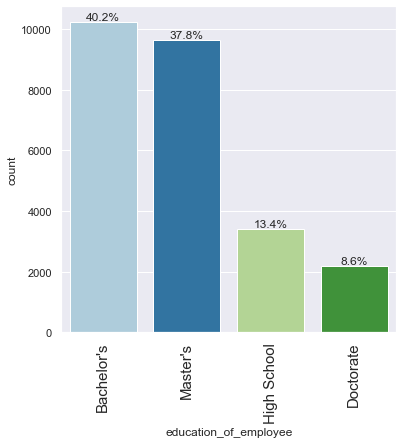

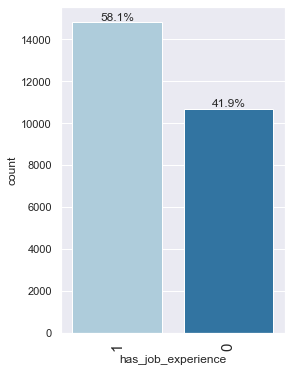

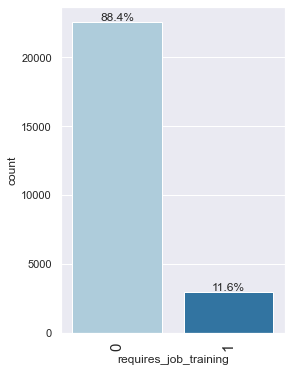

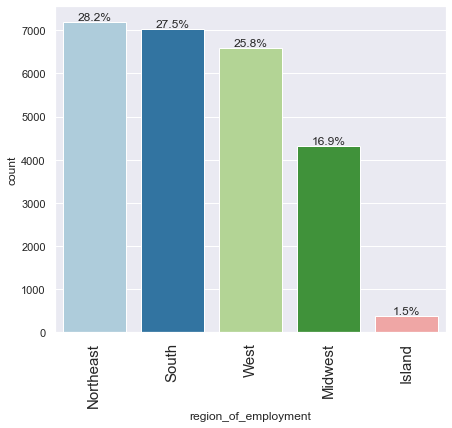

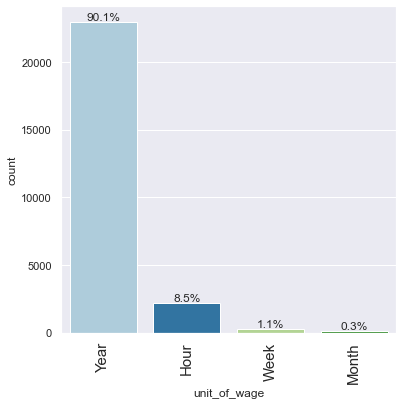

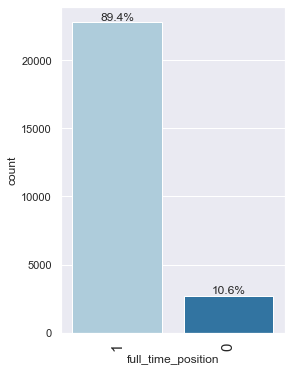

<IPython.core.display.Javascript object>

In [157]:
for col in category_columns:
    labeled_barplot(visa_copy, col, perc=True)

#### Observations:

- Employees are mostly from Asia.
- Employees under work visa mostly have Bachelor's degree and Master's degree
- There are both kind of employees working in work visa who has job exp and who doesn't have job experience.
- Employees under work visa are high skilled labors and doesn't require training
- Employees working with visa in west northern and south are almost equal, midwest has count less than other 3. Island has relatively a very small head count of employees working with work visa.
- Yearly wage people are more than hourly, weekly and monthly wage employees
- Employees applying as a full_time_position employee is more than contract employees
- case_status certified is more compared to denied

### Bivariate analysis

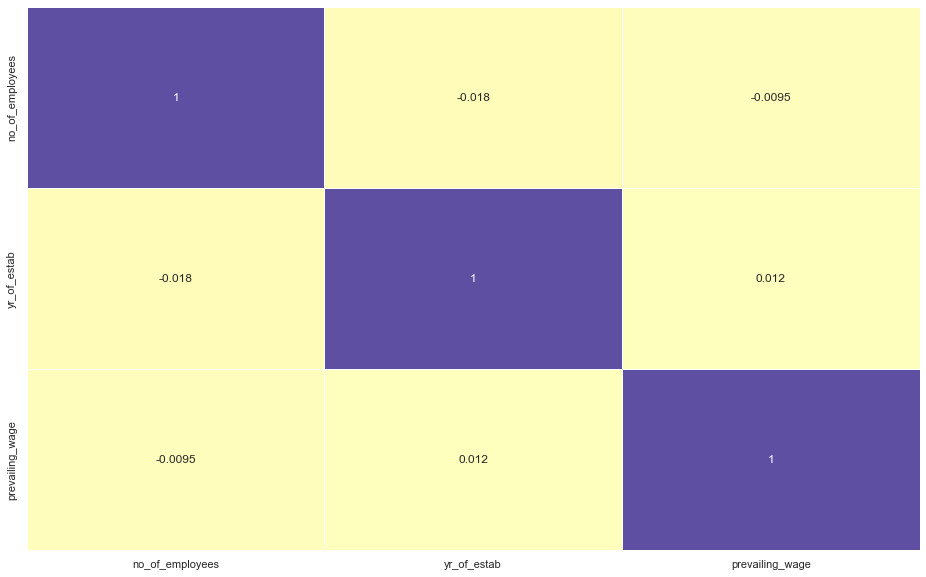

<IPython.core.display.Javascript object>

In [158]:
sns.set(rc={"figure.figsize": (16, 10)})
sns.heatmap(
    visa_copy.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="Spectral"
)
plt.show()

#### Observations
- The variables no_of_employees, yr_of_estab and prevailing_wage are not correlated